In [1]:
using Turing
using Random
using ForwardDiff
using LimberJack
using CSV
using NPZ
using FITSIO
using Plots
using LinearAlgebra
using LaTeXStrings

In [30]:
x=1
y=2
string("nz_", x, y)

"nz_12"

In [2]:
Wms = 0.104:0.004:0.5

0.104:0.004:0.5

In [3]:
length(Wms)

100

In [4]:
ell = npzread("../data/DESY1_cls/DESgc_DESwl/cl_DESgc__2_DESwl__3.npz")["ell"]
ell = [Int(floor(l)) for l in ell]
nzs = FITS("../data/DESY1_cls/y1_redshift_distributions_v1.fits")
nz1 = read(nzs["nz_lens"], "BIN1")
nz2 = read(nzs["nz_lens"], "BIN2")
nz3 = read(nzs["nz_lens"], "BIN3")
nz4 = read(nzs["nz_lens"], "BIN4")
nz5 = read(nzs["nz_lens"], "BIN5")
zs = read(nzs["nz_lens"], "Z_MID");

In [5]:
length(ell)

39

In [6]:
true_cosmology = LimberJack.Cosmology(0.25, 0.05, 0.67, 0.96, 0.81,
                                      tk_mode="EisHu", Pk_mode="Halofit");
tg1 = NumberCountsTracer(true_cosmology, zs, nz1, 2.)
tg2 = NumberCountsTracer(true_cosmology, zs, nz2, 2.)
tg3 = NumberCountsTracer(true_cosmology, zs, nz3, 2.)
tg4 = NumberCountsTracer(true_cosmology, zs, nz4, 2.)
tg5 = NumberCountsTracer(true_cosmology, zs, nz5, 2.)
ts1 = WeakLensingTracer(true_cosmology, zs, nz1)
ts2 = WeakLensingTracer(true_cosmology, zs, nz2)
ts3 = WeakLensingTracer(true_cosmology, zs, nz3)
ts4 = WeakLensingTracer(true_cosmology, zs, nz4)
ts5 = WeakLensingTracer(true_cosmology, zs, nz5)
tracers = [tg1, tg2, tg3, tg4, tg5,
           ts1, ts2, ts3, ts4, ts5]
true_gg11 = [angularCℓ(true_cosmology, tg1, tg1, ℓ) for ℓ in ell]
true_gg22 = [angularCℓ(true_cosmology, tg2, tg2, ℓ) for ℓ in ell]
true_gg33 = [angularCℓ(true_cosmology, tg3, tg3, ℓ) for ℓ in ell]
true_gg44 = [angularCℓ(true_cosmology, tg4, tg4, ℓ) for ℓ in ell]
true_gg55 = [angularCℓ(true_cosmology, tg5, tg5, ℓ) for ℓ in ell]
true_gs11 = [angularCℓ(true_cosmology, tg1, ts1, ℓ) for ℓ in ell]
true_gs22 = [angularCℓ(true_cosmology, tg2, ts2, ℓ) for ℓ in ell]
true_gs33 = [angularCℓ(true_cosmology, tg3, ts3, ℓ) for ℓ in ell]
true_gs44 = [angularCℓ(true_cosmology, tg4, ts4, ℓ) for ℓ in ell]
true_gs55 = [angularCℓ(true_cosmology, tg5, ts5, ℓ) for ℓ in ell]
true_ss11 = [angularCℓ(true_cosmology, ts1, ts1, ℓ) for ℓ in ell]
true_ss22 = [angularCℓ(true_cosmology, ts2, ts2, ℓ) for ℓ in ell]
true_ss33 = [angularCℓ(true_cosmology, ts3, ts3, ℓ) for ℓ in ell]
true_ss44 = [angularCℓ(true_cosmology, ts4, ts4, ℓ) for ℓ in ell]
true_ss55 = [angularCℓ(true_cosmology, ts5, ts5, ℓ) for ℓ in ell]
true_cls = [true_gg11, true_gg22, true_gg33, true_gg44, true_gg55,
            true_gs11, true_gs22, true_gs33, true_gs44, true_gs55,
            true_ss11, true_ss22, true_ss33, true_ss44, true_ss55]
true_data = vcat(true_cls...)

data = true_data #+ 0.1 * true_data .* rand(length(true_data)) 

data_mean = mean(data)

covmat = Diagonal(0.0001.*(data_mean.+data));
covmat = (cl_aa*cl_bb+cl_ab^2)/(2*ell+1)
#inv_cov = Inverse(cov)
inv_covmat = Diagonal((0.0001.*(data_mean.+data)).^(-1));

In [ ]:
cov_mats = []
for cl in true_cls
    

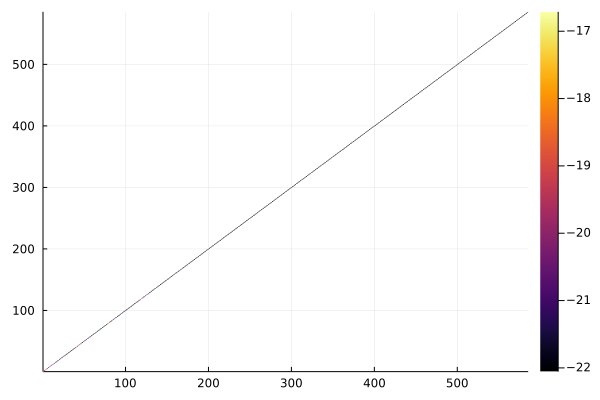

In [7]:
heatmap(1:size(covmat,1), 1:size(covmat,2), log.((covmat.^2).^0.5))

In [8]:
function Cls_Wm(p::T)::Array{T,1} where T<:Real
    Wm = p
    cosmology = LimberJack.Cosmology(Wm, 0.05, 0.67, 0.96, 0.81,
                                 tk_mode="EisHu", Pk_mode="Halofit")
    tg1 = NumberCountsTracer(cosmology, zs, nz1, 2.)
    tg2 = NumberCountsTracer(cosmology, zs, nz2, 2.)
    tg3 = NumberCountsTracer(cosmology, zs, nz3, 2.)
    tg4 = NumberCountsTracer(cosmology, zs, nz4, 2.)
    tg5 = NumberCountsTracer(cosmology, zs, nz5, 2.)
    ts1 = WeakLensingTracer(cosmology, zs, nz1)
    ts2 = WeakLensingTracer(cosmology, zs, nz2)
    ts3 = WeakLensingTracer(cosmology, zs, nz3)
    ts4 = WeakLensingTracer(cosmology, zs, nz4)
    ts5 = WeakLensingTracer(cosmology, zs, nz5)
    gg11 = [angularCℓ(cosmology, tg1, tg1, ℓ) for ℓ in ell]
    gg22 = [angularCℓ(cosmology, tg2, tg2, ℓ) for ℓ in ell]
    gg33 = [angularCℓ(cosmology, tg3, tg3, ℓ) for ℓ in ell]
    gg44 = [angularCℓ(cosmology, tg4, tg4, ℓ) for ℓ in ell]
    gg55 = [angularCℓ(cosmology, tg5, tg5, ℓ) for ℓ in ell]
    gs11 = [angularCℓ(cosmology, tg1, ts1, ℓ) for ℓ in ell]
    gs22 = [angularCℓ(cosmology, tg2, ts2, ℓ) for ℓ in ell]
    gs33 = [angularCℓ(cosmology, tg3, ts3, ℓ) for ℓ in ell]
    gs44 = [angularCℓ(cosmology, tg4, ts4, ℓ) for ℓ in ell]
    gs55 = [angularCℓ(cosmology, tg5, ts5, ℓ) for ℓ in ell]
    ss11 = [angularCℓ(cosmology, ts1, ts1, ℓ) for ℓ in ell]
    ss22 = [angularCℓ(cosmology, ts2, ts2, ℓ) for ℓ in ell]
    ss33 = [angularCℓ(cosmology, ts3, ts3, ℓ) for ℓ in ell]
    ss44 = [angularCℓ(cosmology, ts4, ts4, ℓ) for ℓ in ell]
    ss55 = [angularCℓ(cosmology, ts5, ts5, ℓ) for ℓ in ell]
    return vcat([gg11, gg22, gg33, gg44, gg55,
                 gs11, gs22, gs33, gs44, gs55,
                 ss11, ss22, ss33, ss44, ss55]...)
end

Cls_Wm (generic function with 1 method)

In [9]:
function Cls_diffWm(Wm)
    return ForwardDiff.derivative(Cls_Wm, Wm)
end

Cls_diffWm (generic function with 1 method)

In [10]:
function FF(Wm)
    cls_diff = Cls_diffWm(Wm)
    return dot(cls_diff'*inv_covmat, cls_diff)
end

FF (generic function with 1 method)

In [11]:
FF(0.25)

491.02959543669397

In [12]:
Wm_std = sqrt(1/FF(0.25))

0.045128008196880044

In [13]:
theories = [Cls_Wm(Wm) for Wm in Wms];

In [14]:
function lkl(data, theory, inv_cov)
    diff = @.(data-theory)
    X2 = dot(diff'inv_covmat, diff)
    lkl = @.(exp(-0.5*X2))
    return lkl
end

lkl (generic function with 1 method)

In [15]:
lkls = [lkl(data, theory, inv_covmat) for theory in theories];

In [16]:
Z = sum(lkls)
Pos = lkls./Z;

In [17]:
meanw = sum(Wms .* Pos)/sum(Pos)
stdw = sqrt(sum(Pos.*(Wms.-meanw).^2)/sum(Pos));

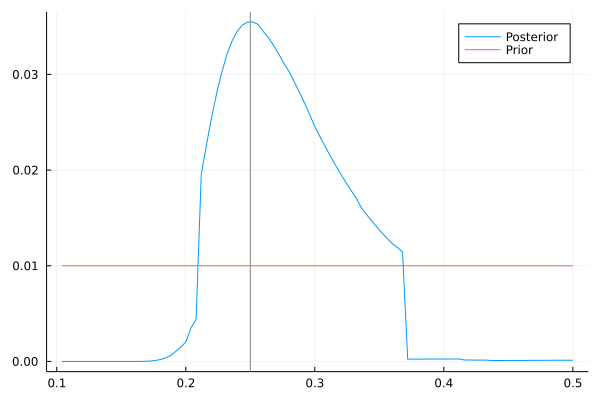

In [18]:
plot(Wms, Pos, label="Posterior")
plot!(Wms, (1/length(Wms)).*ones(length(Wms)), label="Prior")
vline!([0.25], color="grey", label="")

In [19]:
print("Omega_m ", meanw, " +/- ", stdw)

Omega_m 0.2777926131243528 +/- 0.04339073169200009